Retention Study - Figuring Out Which Employees May Quit

Loading our Main HR Database Records

Intro:
Many companies in all sorts of industris need to monitor their employees working status, so that to keep a profitable state, and knowing certain employee is leaving can prevent loosing real elites.
For those companies who wish to evluate if a specific employee is leaving or not, data analysis with machine learning can be great help, for classification problem, I choose to start with logistic regression first.

part1: retriving data and EDA

part2: clean data and prepare data for ML models

part3: select the right machine learning model and train and test

part4: conclusion

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


For two different file, read them and join them by their common employee_id #

In [34]:
hr_df = pd.read_csv("hr_data.csv")
sat_eval_df = pd.read_excel("employee_satisfaction_evaluation.xlsx")



In [35]:
hr_df.head()


,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [36]:
main_df = hr_df.set_index('employee_id').join(sat_eval_df.set_index('EMPLOYEE #'))

In [37]:
main_df = main_df.reset_index()
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [38]:
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            14999 non-null  int64  
 1   number_project         14999 non-null  int64  
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   Work_accident          14999 non-null  int64  
 5   left                   14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   satisfaction_level     14972 non-null  float64
 10  last_evaluation        14972 non-null  float64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [40]:
main_df.select_dtypes(exclude=['int', 'float']).columns

Index(['department', 'salary'], dtype='object')

In [41]:
print(hr_df['department'].unique())
print(hr_df['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


check to see if there is any missing data?


In [42]:
main_df.isnull().any(axis =1)#check to see if there is any missing data through row, gives back boolean accordingly

0        False
1        False
2        False
3        False
4        False
         ...  
14994    False
14995    False
14996    False
14997    False
14998    False
Length: 14999, dtype: bool

In [43]:
main_df[main_df.isnull().any(axis =1)]#all rows which have missing data

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


fill them with mean values with its mean of coloumns 
https://stackoverflow.com/questions/18689823/pandas-dataframe-replace-nan-values-with-average-of-columns

In [44]:
main_df.fillna(main_df.mean(),inplace=True)


check if success

In [45]:
# main_df[main_df.isnull().any(axis =1)]
main_df.loc[18]#or like this

employee_id                  3794
number_project                  2
average_montly_hours          160
time_spend_company              3
Work_accident                   1
left                            1
promotion_last_5years           1
department                  sales
salary                        low
satisfaction_level        0.61283
last_evaluation          0.716125
Name: 18, dtype: object

In [46]:
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [47]:
salary = pd.get_dummies(main_df['salary'], drop_first= True)
department = pd.get_dummies(main_df['department'],drop_first= True)
#salary
department


,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,1,0


In [48]:
main_df.drop(['employee_id','salary','department'],axis= 1, inplace=True)


In [49]:
main_df = pd.concat([main_df, salary,department],axis=1)#axis = 1 其实是说每一行都加上，看起来像列的组合一样？
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   number_project         14999 non-null  int64  
 1   average_montly_hours   14999 non-null  int64  
 2   time_spend_company     14999 non-null  int64  
 3   Work_accident          14999 non-null  int64  
 4   left                   14999 non-null  int64  
 5   promotion_last_5years  14999 non-null  int64  
 6   satisfaction_level     14999 non-null  float64
 7   last_evaluation        14999 non-null  float64
 8   low                    14999 non-null  uint8  
 9   medium                 14999 non-null  uint8  
 10  RandD                  14999 non-null  uint8  
 11  accounting             14999 non-null  uint8  
 12  hr                     14999 non-null  uint8  
 13  management             14999 non-null  uint8  
 14  marketing              14999 non-null  uint8  
 15  pr

In [50]:
main_df.tail()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,low,medium,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
14994,2,151,3,0,1,0,0.40,0.57,1,0,0,0,0,0,0,0,0,1,0
14995,2,160,3,0,1,0,0.37,0.48,1,0,0,0,0,0,0,0,0,1,0
14996,2,143,3,0,1,0,0.37,0.53,1,0,0,0,0,0,0,0,0,1,0
14997,6,280,4,0,1,0,0.11,0.96,1,0,0,0,0,0,0,0,0,1,0
14998,2,158,3,0,1,0,0.37,0.52,1,0,0,0,0,0,0,0,0,1,0


In [51]:
main_df.describe()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,low,medium,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.00000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.61283,0.716125,0.487766,0.429762,0.052470,0.051137,0.049270,0.042003,0.057204,0.060137,0.276018,0.148610,0.181345
std,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.24849,0.170984,0.499867,0.495059,0.222981,0.220284,0.216438,0.200602,0.232239,0.237749,0.447041,0.355715,0.385317
min,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.09000,0.360000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.44000,0.560000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.64000,0.720000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.82000,0.870000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
#how many have left? 0 stay 1 left
len(main_df.loc[main_df['left']==1])

3571

<AxesSubplot:>

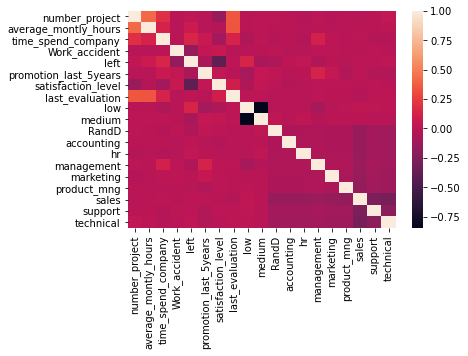

In [53]:
p = sns.heatmap(main_df.corr())
p

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test = train_test_split(main_df.drop('left',axis = 1),main_df['left'],test_size=0.3,random_state=101)

Start with logistic regression for its ability to fit a classification problem

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)


LogisticRegression(max_iter=1000)

In [58]:
pred = logmodel.predict(X_test)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[3182  249]
 [ 691  378]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3431
           1       0.60      0.35      0.45      1069

    accuracy                           0.79      4500
   macro avg       0.71      0.64      0.66      4500
weighted avg       0.77      0.79      0.77      4500



Trying RFC to see if it works better

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)


RandomForestClassifier()

In [61]:
pred_rfc = rfc.predict(X_test)


In [62]:
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

[[3426    5]
 [  35 1034]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3431
           1       1.00      0.97      0.98      1069

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



In [63]:
#what is the most influential factor?
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = pd.DataFrame(X_train).columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances
#categorical problem --> rfc?

,importance
satisfaction_level,0.322843
time_spend_company,0.184131
number_project,0.181864
average_montly_hours,0.153651
last_evaluation,0.113888
Work_accident,0.009671
low,0.007712
technical,0.004250
medium,0.003827
sales,0.003600


The most influential part is satisfaction_level of the employee, and since the large difference of the accuracy of those two models, I could say in this single case RFC is better in classification than logistic regression(?).